In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Dataset overview

Датасет сожержит информацию о кредитах выданных на покупку недвижимости.

| Variable |	Description |
|----------|----------------|
|ID	       |идентификатор заявки клиента на кредит|
|year	   |год подачи заявки на кредит|
|loan_limit|указывает, является ли кредит соответствующим лимитам (cf) или несоответствующим (ncf)|
|Gender	   |пол заёмщика (male, female, joint, sex not available)|
|approv_in_adv|	указывает, был ли кредит одобрен заранее (pre, nopre)|
|loan_type |тип кредита (type1, type2, type3)|
|loan_purpose|	цель кредита (p1, p2, p3, p4)|
|Credit_Worthiness |	кредитоспособность заёмщика (l1, l2)|
|open_credit|	указывает, есть ли у заявителя открытые кредитные счета (opc, nopc)|
|business_or_commercial|	указывает, предназначен ли кредит для бизнесса/коммерческих целей (ob/c - - business/commercial, nob/c - personal)|
|loan_amount|	размер кредита|
|rate_of_interest|	процентная ставка по кредиту|
|Interest_rate_spread|	разница между процентной ставкой по кредиту и базовой процентной ставкой|
|Upfront_charges |	это первоначальные сборы, которые взимаются при оформлении кредита, то есть расходы, связанные с получением займа. К таким сборам могут относиться комиссии за рассмотрение заявки, оценка имущества (если это залоговый кредит), услуги нотариуса, страхование и другие платежи, необходимые для оформления и выдачи кредитных средств|
|term |срок кредита в месяцах	|
|Neg_ammortization |	указывает, допускает ли кредит отрицательную амортизацию (neg_amm, not_neg)|
|interest_only |	указывает, есть ли у кредита возможность оплаты только процентов (int_only, not_int)|
|lump_sum_payment |	указывает, требуется ли единовременный платеж в конце срока кредита (lpsm, not_lpsm)|
|property_value |	стоимость финансируемой недвижимости|
|construction_type |	тип здания (sb - site built, mh - manufactured home)|
|occupancy_type |	категория здания по назначению (pr - primary residence, sr- secondary residence, ir - investment property)|
|Secured_by|	тип залога, обеспечивающего кредит (home, land)|
|total_units|	количество юнитов/объектов в финансируемом объекте недвижимости (1U, 2U, 3U, 4U)|
|income|	годовой доход заявителя|
|credit_type|	тип кредита (CIB - credit information bureau , CRIF - CIRF credit - information bureau, EXP - experian , EQUI - equifax)|
|Credit_Score|	кредитный рейтинг заявителя|
|co-applicant_credit_type|	тип кредита созаявителя (CIB - credit information bureau EXP - experian)|
|age |	возраст заёмщика|
|submission_of_application|	указывает, как было подано заявление (to_inst - to institution (в учреждении, лично), - not_inst - not to institution)|
|LTV|	Коэффициент соотношения суммы кредита к стоимости недвижимости, рассчитываемый как сумма кредита, деленная на стоимость недвижимости|
|Region|	географический регион, в котором находится недвижимость (North, south, central, North-East)|
|Security_Type|	тип обеспечения или залога, обеспечивающего кредит(direct, indirect)|
|Status|	указывает, был ли кредит невыплачен (1) или нет (0)|
|dtir1|	соотношение долга к доходу|

In [255]:
data = pd.read_csv(r'Data\Loan_Default.csv')

In [256]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [257]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

Уберём из рассмотрения признак ID. 

In [258]:
data = data.drop(['ID'], axis=1)

## 1.1 Распределение целевой переменной

Давайте более подробно посмотрим на соотношение целевых классов.

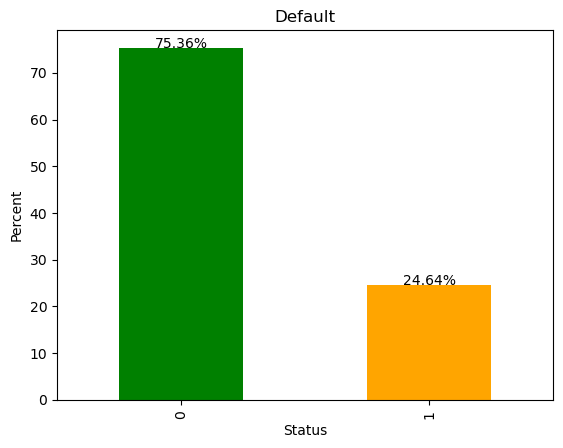

In [259]:
def draw_target_percents(data):
    percent_class = (data['Status'].value_counts() / data.shape[0] * 100)
    colors = ['green', 'orange']
    percent_class.plot(kind='bar', label='Churn', ylabel='Percent', color=colors)
    plt.title('Default')
    for index in percent_class.keys():
        plt.text(index, percent_class[index], '{:.2f}%'.format(percent_class[index]),ha='center')
draw_target_percents(data)

Доли объектов положительного и отрицательного класса существенно различаются, классы не сбалансированы. Выплаченных кредитов - 75%, а не выплаченных - 25%.

## 1.2 Распределение пропусков по признакам и целевой переменной.

В датасете достаточно много пропущенных данных. Рассмотрим процент пропущенных данных для каждого признака. 

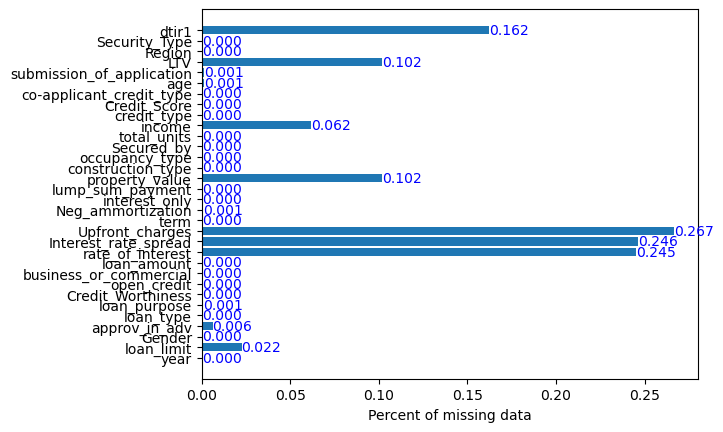

In [260]:
def draw_percent_of_missed_data(data): 
    column_names = data.columns.to_list()
    column_names.remove('Status')
    amt_data = data.shape[0]
    skipDataByFeatures = {}
    for feature in column_names:
        prcnt_skip_data = data[feature].isnull().sum() / amt_data
        skipDataByFeatures[feature] = prcnt_skip_data
        

    categories, values = list(skipDataByFeatures.keys()), list(skipDataByFeatures.values())
    fig, ax = plt.subplots()
    bars = ax.barh(categories, values)
    ax.set_xlabel('Percent of missing data')
    ax.bar_label(bars, label_type='edge', color='blue', labels= [f"{p:.3f}"  for p in values ])
    plt.show()

draw_percent_of_missed_data(data)

Больше всего пропусков у признаков dtir1, LTV, propertry_value, Upfront_charges, Interes_rate_spread, rate_of_interest. Рассмотрим пропуски по этим признакам относительно целевой переменой.

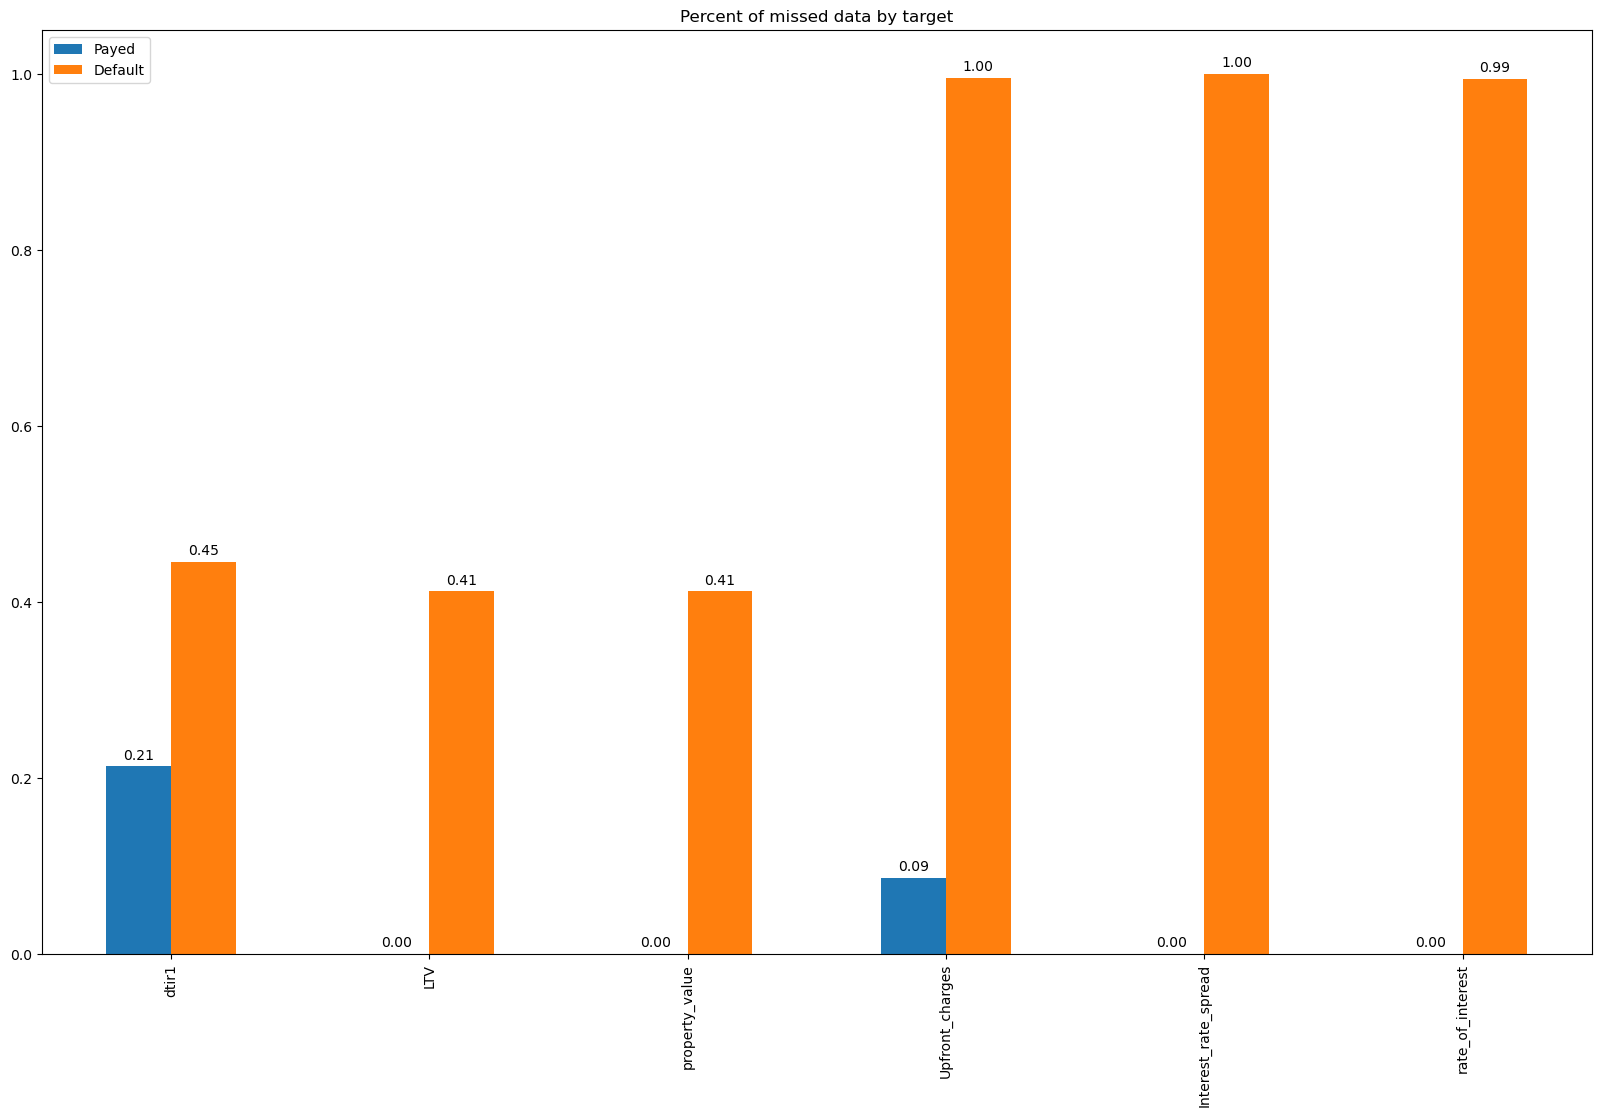

In [261]:
def draw_percent_missed_by_target(data, max_skip_features):
    amt_default = data[data['Status'] == 1].shape[0]
    amt_payed = data[data['Status'] == 1].shape[0]
    skipDataByFeatures = {}
    for feature in max_skip_features:
        prcnt_skip_data = data[data['Status'] == 0][feature].isnull().sum() / amt_payed
        skipDataByFeatures[feature] = [prcnt_skip_data]
        
        prcnt_skip_data = data[data['Status'] == 1][feature].isnull().sum() / amt_default
        skipDataByFeatures[feature].append(prcnt_skip_data)
    missedData = pd.DataFrame(skipDataByFeatures.values(), skipDataByFeatures.keys(), columns=['Payed', 'Default'])
    ax = missedData.plot(kind='bar', figsize=(20,12))

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3)
    plt.title('Percent of missed data by target')
    plt.show()
max_skip_features = ['dtir1', 'LTV', 'property_value', 'Upfront_charges', 'Interest_rate_spread', 'rate_of_interest']
draw_percent_missed_by_target(data, max_skip_features)

Выводы:
- Для не выполоченных кредитов (Default) полностью отсутствует информация о признаках rate_of_interest, interest_rate_spread, Upfront_charges, при этом в данных по этим признаков для выплаченных кредитов нет пропусков.
- Для не выполоченных кредитов (Default)  информация о признаках LTV, dtir1 отсутсвует примерно для 40% данных.
- Для выполоченных кредитов частично отсутствует информация о признаках LTV, dtir1 и income
- У признака income (доход) иногда встречаются значения равные 0, возможно это ошибка в данных. 

# 2. Data preprocessing

## 2.1 Filling in the blanks

### Year

In [262]:
data_processed = data

In [263]:
data['year'].unique()

array([2019])

Заметим, что в данных представлен только 2019 год, а значит признак year не информативен. Уберём его.

In [264]:
data_processed = data_processed.drop(['year'], axis=1)

### rate_of_interest, interest_rate_spread, Upfront_charges

В силу того, что информация о признаках rate_of_interest, interest_rate_spread, Upfront_charges для не выплаченных кредитов отсутствует полностью и восстановить её невозможно, уберём эти признаки из датасета.  

In [265]:
data_processed = data_processed.drop(['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges'], axis=1)

###  dtir1, submission_of_application, Neg_ammortization, approv_in_adv, loan_limit

- **dtir1**.
К сожалению, для этого признака доля пропущенных данных велика (45% для невыплоченных и 21% для выплоченных займов). Восстановить пропуски невозможно, потому что ddt1 расчитывается как: (сумма всех долговых обязательств на месяц / доход за месяц) * 100. Проблема в том, что у многих заявителей есть кредиты помимо текущего займа, а таблица  не содержит информацию о сумме других кредитов. Поэтому исключим из датасета все объекты с пропущенными значениями этого признака.
- **submission_of_application, Neg_ammortization, approv_in_adv, loan_limit**
Для признаков submission_of_application, Neg_ammortization, approv_in_adv, loan_limit есть незначительные пропуски (меньше 2%), поэтому удалим объекты с пропусками в этих признаках. 


In [266]:
data_processed = data_processed.dropna(subset=['dtir1','submission_of_application', 'Neg_ammortization', 'approv_in_adv', 'loan_limit', 'loan_purpose', 'term'], how='any')

### Income

Вспомним, что среди признака Income встречаются 0 значения и посмотрим как эти пропуски распределены относительно целевой переменной.

In [267]:
print('Default', data_processed[(data_processed['income'] == 0) & (data_processed['Status'] == 1)]['income'].value_counts())
print('Payed',data_processed[(data_processed['income'] == 0) & (data_processed['Status'] == 0)]['income'].value_counts())

Default income
0.0    333
Name: count, dtype: int64
Payed income
0.0    8
Name: count, dtype: int64


Абсолютное большенство 0 у объектов с невыплаченным заёмом. Учитывая, что для не выплаченных кредитов было много пропусков, будем считать 0 значения пропущенными. 

In [268]:
data_processed['income'] = data_processed['income'].replace(0.0, np.nan)

Пропусков для признака income было немного и можно их востановить медианным доходом для заёмщиков того же возраста. 

In [269]:
medianIncomeByAge = data_processed.groupby(['age'])['income'].median().to_dict()
data_processed['income'] = data_processed['income'].fillna(data['age'].map(medianIncomeByAge))
print(data_processed['income'].isnull().sum())

0


### Property_value

Property_value восстановим из предположения, о том, что объекты имеющие одиноковую конструкцию, тип применения, географическое расположение и состоящие из одинакового количества зданий в среднем имеют схожую стоимость 

In [270]:
similar_building_price = data_processed.groupby(['construction_type', 'occupancy_type', 'total_units', 'Region'])['property_value'].transform('median')
data_processed['property_value'] = data_processed['property_value'].fillna(similar_building_price)

### LTV

In [271]:
data_processed['LTV'] = data_processed['LTV'].fillna((data_processed['loan_amount'] / data_processed['property_value']) * 100)

### Age
Возраст в датасете задан не числом, а диапозоном хранящимся в виде строки (например: '25-34'), поэтому преобразуем возраст в число. 

In [272]:
data_processed.age.unique()

array(['25-34', '35-44', '45-54', '55-64', '65-74', '>74', '<25'],
      dtype=object)

In [273]:
age_mapping = {'45-54':50, '55-64':60, '35-44':40, '65-74':70, '25-34':30, '>74':80, '<25':20}
data_processed['age'] = data_processed['age'].map(age_mapping)

### Total units

In [274]:
data_processed.total_units.unique()

array(['1U', '2U', '3U', '4U'], dtype=object)

In [275]:
unitMapping = {'1U':1, '2U':2, '3U':3, '4U':4}
data_processed['total_units'] = data_processed['total_units'].map(unitMapping)

Теперь в датасете не осталось пропусков.

In [276]:
data_processed.isna().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
dtype: int64

## 2.2 outliers processing

In [277]:
data_clean = data_processed
numeric_features = data_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

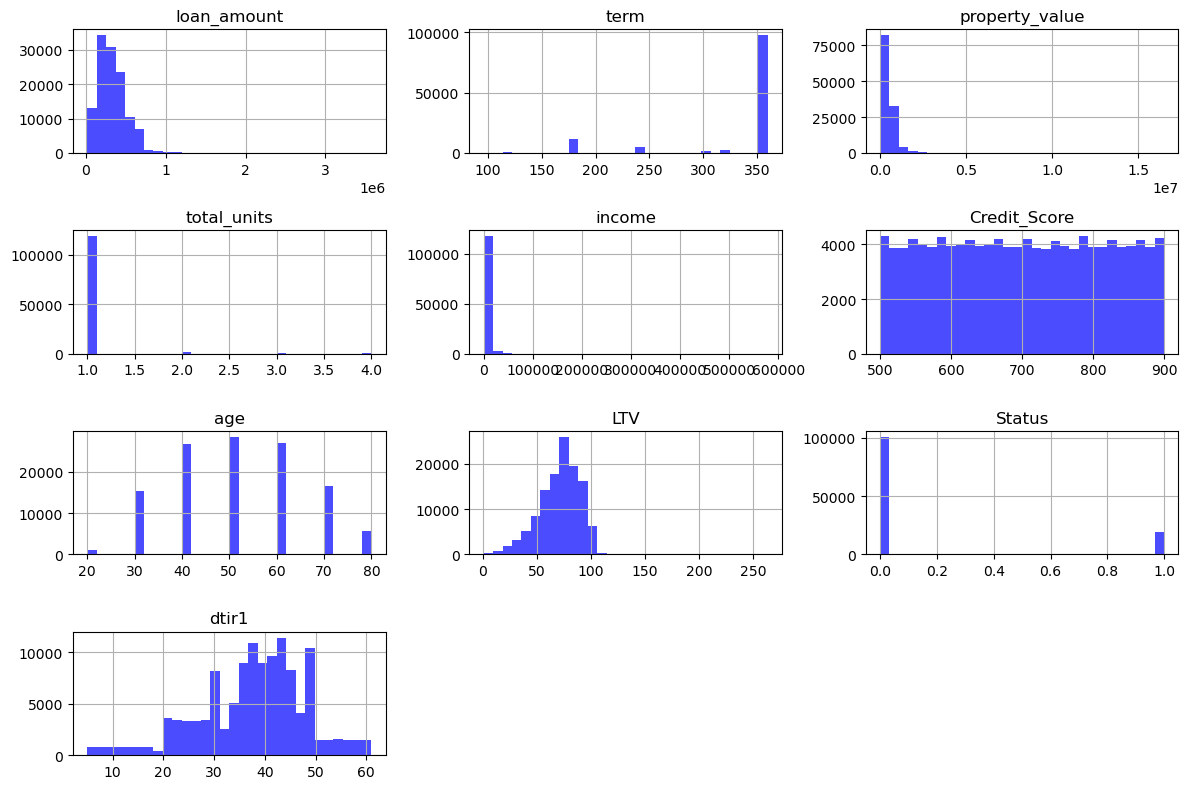

In [278]:
ax = data_clean[numeric_features].hist(figsize=(12, 8), bins=30, alpha=0.7, color='blue')
plt.tight_layout()
plt.show()

In [279]:
data_clean[data_clean['total_units'] == 1].shape[0] / data_clean.shape[0]

0.9850874938866185

Почти все объекты недвижимости содержат всего 1 здание, поэтому уберем признак total_units из рассмотрения.

In [280]:
data_clean = data_clean.drop(['total_units'], axis=1)

In [281]:
continuos_numeric_features = ['loan_amount', 'property_value', 'income', 'Credit_Score','LTV', 'dtir1']

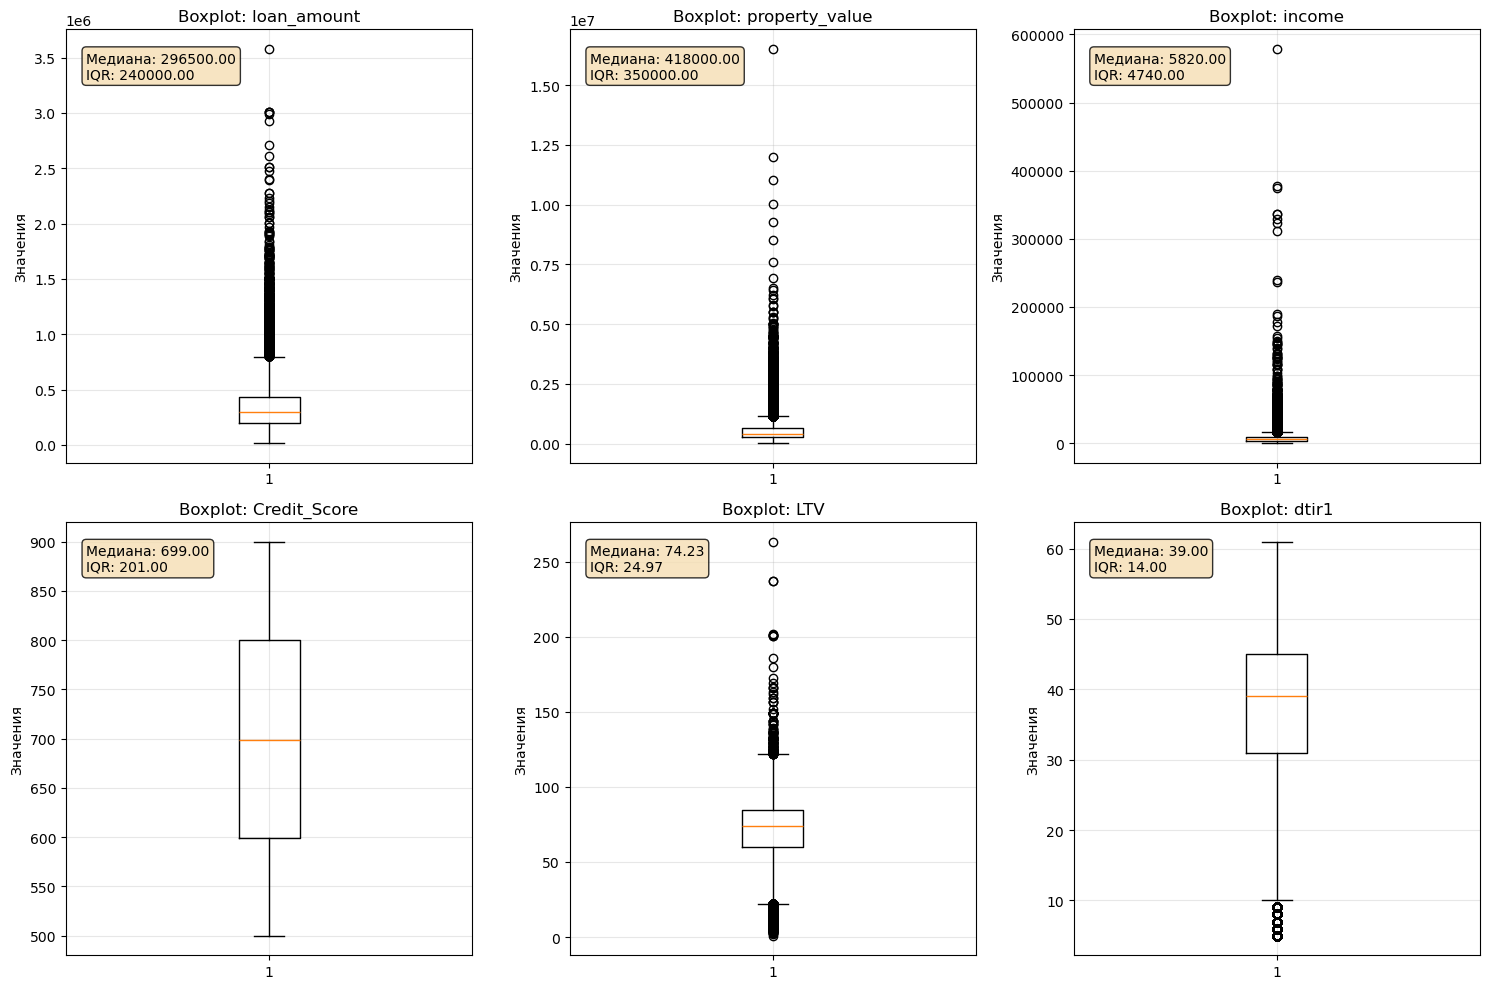

In [282]:
# Создаем сетку графиков
def draw_boxPlots(data):
    n_cols = 3
    n_rows = (len(continuos_numeric_features) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    for i, col in enumerate(continuos_numeric_features):
        # Вертикальный boxplot
        axes[i].boxplot(data[col].dropna(), vert=True)
        axes[i].set_title(f'Boxplot: {col}')
        axes[i].set_ylabel('Значения')
        axes[i].grid(True, alpha=0.3)
        
        # Добавляем основные статистики
        stats = data[col].describe()
        axes[i].text(0.05, 0.95, f'Медиана: {stats["50%"]:.2f}\n'
                                f'IQR: {stats["75%"]-stats["25%"]:.2f}', 
                    transform=axes[i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    # Скрываем пустые subplots
    for i in range(len(continuos_numeric_features), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
draw_boxPlots(data_processed)

Логично предположить, что для признака LTV значения большие 220% (это значит что размер кредита в 2.2 раза превышает стоимость недвижимости) являются выбросами. Отфильтруем такие значения.

In [283]:
data_clean = data_clean[data_clean['LTV'] < 220]

Отфильтруем выбросы по ризнакам loan_amount, propertry_value, income.

In [284]:
check_features = ['loan_amount', 'property_value', 'income']
quantiles = {}
for feature in check_features:
    quantiles[feature] = (data_clean[feature].quantile(0.02),  data_clean[feature].quantile(0.98))

In [285]:
for feature, q in quantiles.items():
    print(feature, data_clean[(data_clean[feature] > q[0]) & (data_clean[feature] < q[1])].shape[0] /data_clean.shape[0])

loan_amount 0.9487126349122138
property_value 0.9589087653563672
income 0.9579969162922559


In [286]:
for feature, q in quantiles.items():
    data_clean = data_clean[(data_clean[feature] > q[0]) & (data_clean[feature] < q[1])]
    

### 2.3 Feature engineering

Логорифмируем признак income, loan_amount, property_value

In [287]:
data_clean['income'] = np.log10(data_clean['income'])
data_clean['loan_amount'] = np.log10(data_clean['loan_amount'])
data_clean['property_value'] = np.log10(data_clean['property_value'])


Превратим переменную term в категориальную, по следующим причинам: 
- Мало уникальных значений (скорее всего 180, 240, 300, 360 дней и т.д.)

- Не линейная зависимость с дефолтом (риск может не расти линейно со сроком)

- Категориальная природа - это дискретные "продуктовые" категории, а не непрерывная величина


In [288]:
def categorize_term(term):
    if pd.isna(term):
        return 'unknown'
    elif term <= 150:
        return 'very_short_term'     
    elif term <= 200:
        return 'short'    
    elif term <= 330:
        return 'medium_term'
    else:
        return 'long_term'   
    

data_clean['term_category'] = data_clean['term'].apply(categorize_term)

In [289]:
data_clean = data_clean.drop(['term'], axis=1)

Сохраним очищенные данные

In [290]:
data_clean.to_csv('Data/clean_data.csv', index=False)

# 3. EDA

In [291]:
data_clean = pd.read_csv('Data\clean_data.csv')

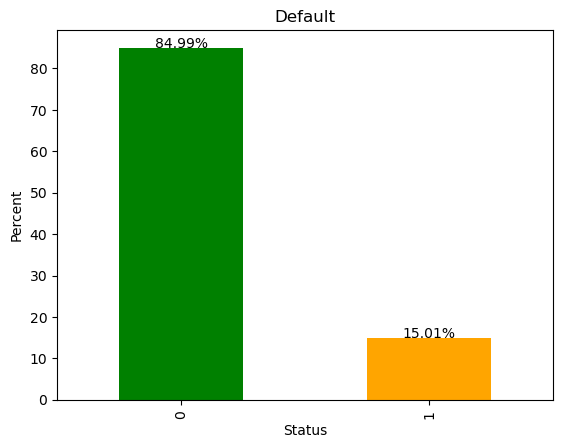

In [292]:
draw_target_percents(data_clean)

Присутсвует сильный дисбаланс классов

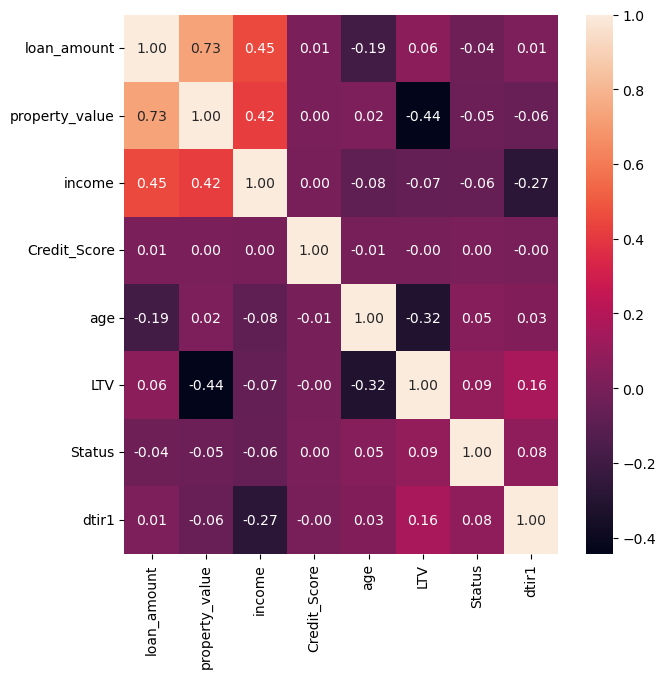

In [293]:
continuos_numeric_features = data_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize = (7,7))
sns.heatmap(data_processed[continuos_numeric_features].corr(),annot=True, fmt='.2f')
plt.show()

**Выводы:**
 - Существует корреляция между размером кредита (loan_amount) и ценой недвижимости (property_value). Это логично, потому что размер заёма зависит от стоимости недвижимости для покупки которой он оформляется
 - Так же взаимосвязаны доход (income), размер кредита (loan_amount) и стоимость недвижимости (property_value)
 - LTV коррелирует со стоимостью недвижимости (property value). Это объясняется тем, как вычисляется LTV. 


## 2.1 Hypotheses

- 1. Заёмщики с высоким кредитным рейтингом чаще возвращают кредиты
- 2. Крупные кредиты возвращают чаще
- 3. Люди которые выплатили кредит зарабатывают больше внезависимости от пола
- 4. Гендер заёмщика не влияет на выплату  кредита
- 5. Кредиты с большим сроком чаще возвращают
- 6. Цель кредита не влияет на вероятность его возврата
- 7. Коммерческие кредиты возвращают чаще
- 8. Кредиты которые требуют единовременной оплаты по истичению срока, возвращают реже
- 9. Предодобренные кредиты чаще возвращают
- 10. Кредиты соответствующии лимита чаще возвращают
- 11. Заёмщики с высокой кредитоспособностью чаще возвращают кредиты
- 12. Взрослые люди чаще возвращают кредиты, чем более молодые
- 13. Заёмщики с низкм dtir1 (меньшей кредитной нагрузкой) чаще возвращают долг

### Гипотеза 1. Заёмщики с высоким кредитным рейтингом чаще возвращают кредиты

In [294]:
def plot_feature_by_target(df, feature, target='Status'):
    """Универсальная функция для визуализации признака по бинарной цели"""
    
    fig, axes = plt.subplots(1, 2, figsize=(8,5))
    
    
    
    # 3. Boxplot
    sns.boxplot(data=df, x=target, y=feature, ax=axes[0],palette=['lightblue', 'salmon'])
    axes[0].set_title(f'Boxplot {feature} по {target}')
    
    # 4. Violin plot
    sns.violinplot(data=df, x=target, y=feature, ax=axes[1])
    axes[1].set_title(f'Violin plot {feature} по {target}')
    
    plt.tight_layout()
    plt.show()
    
    # Статистика
    print(f"\nСтатистика {feature} по {target}:")
    print(df.groupby(target)[feature].describe())

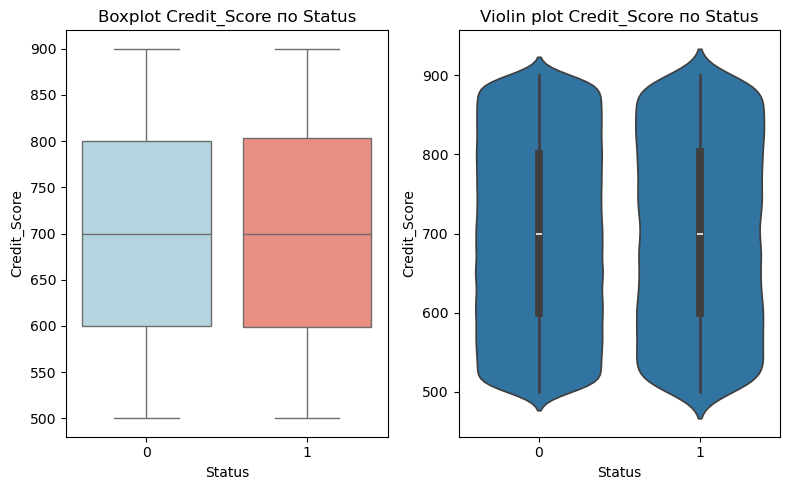


Статистика Credit_Score по Status:
          count        mean         std    min    25%    50%    75%    max
Status                                                                    
0       92437.0  699.539470  115.626095  500.0  600.0  699.0  800.0  900.0
1       16330.0  700.378934  116.926179  500.0  599.0  700.0  803.0  900.0


In [295]:
plot_feature_by_target(data_clean, 'Credit_Score', 'Status')

Гипотеза не оправдалась.Распределения почти полностью совпали.

### Гипотеза 2. Крупные кредиты возвращают чаще. 

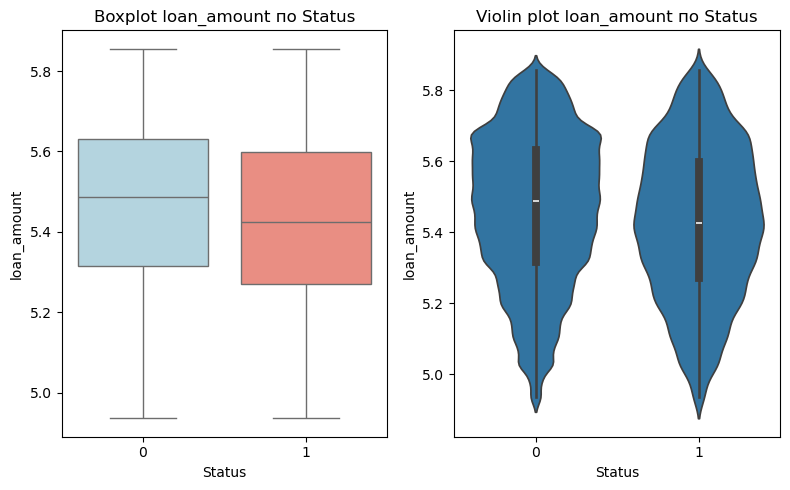


Статистика loan_amount по Status:
          count      mean       std       min       25%       50%       75%  \
Status                                                                        
0       92437.0  5.465065  0.211002  4.937016  5.314920  5.486430  5.629919   
1       16330.0  5.428097  0.212296  4.937016  5.270679  5.425697  5.598243   

             max  
Status            
0       5.855216  
1       5.855216  


In [296]:
plot_feature_by_target(data_clean, 'loan_amount', 'Status')

Гипотеза отчасти подтвердилась. График у выплаченных кредитов находится чуть выше. Так же не стоит забывать, что это графики уже для логорифмированной величины, а значит для исходных величин разница еще заметнее.

### Гипотеза 3. Люди которые выплатили кредит зарабатывают больше внезависимости от пола

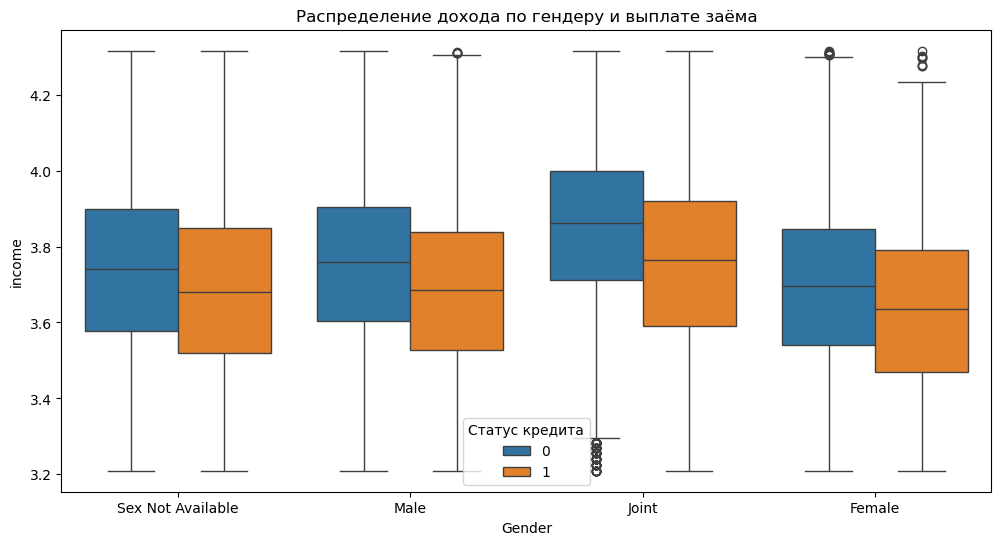

In [297]:
# Пример: распределение дохода по региону, с разбивкой по статусу кредита
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_clean, x='Gender', y='income', hue='Status')
plt.title('Распределение дохода по гендеру и выплате заёма')
plt.legend(title='Статус кредита')
plt.show()

Действительно заёмщики выплатившие кредит имеют более высокие зарплаты.

### Гипотеза 4. Гендер заёмщика не влияет на выплату  кредита

<Figure size 1000x600 with 0 Axes>

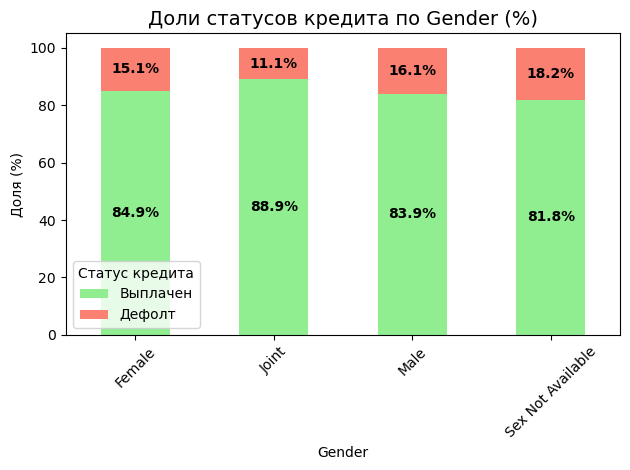

Таблица долей по Gender (%):
                   Выплачен  Дефолт
Gender                             
Female                 84.9    15.1
Joint                  88.9    11.1
Male                   83.9    16.1
Sex Not Available      81.8    18.2



In [298]:
def plot_category_percentages(df, category_col, target_col='Status'):
    # Считаем доли
    category_pct = df.groupby(category_col)[target_col].value_counts(normalize=True).unstack() * 100
    category_pct.columns = ['Выплачен', 'Дефолт']
    
    # Визуализация
    plt.figure(figsize=(10, 6))
    ax = category_pct.plot(kind='bar', stacked=True, 
                          color=['lightgreen', 'salmon'])
    
    plt.title(f'Доли статусов кредита по {category_col} (%)', fontsize=14)
    plt.xlabel(category_col)
    plt.ylabel('Доля (%)')
    plt.legend(title='Статус кредита')
    plt.xticks(rotation=45)
    
    # Добавляем проценты на каждый сегмент
    for i, (category, row) in enumerate(category_pct.iterrows()):
        cumulative = 0
        for status, pct in row.items():
            if pct > 0:  # только если доля > 0%
                ax.text(i, cumulative + pct/2, f'{pct:.1f}%', 
                       ha='center', va='center', fontweight='bold', fontsize=10)
            cumulative += pct
    
    plt.tight_layout()
    plt.show()
    
    print(f"Таблица долей по {category_col} (%):")
    print(category_pct.round(1))
    print("\n" + "="*50)
    
    return category_pct

# Использование
gender_summary = plot_category_percentages(data_clean, 'Gender')

Действительно гендер не имеет значения, а значит этот признак можно убрать из рассмотрения.

In [299]:
data_clean = data_clean.drop(['Gender'], axis=1)

### Гипотеза 5. Кредиты с большим сроком чаще возвращают

<Figure size 1000x600 with 0 Axes>

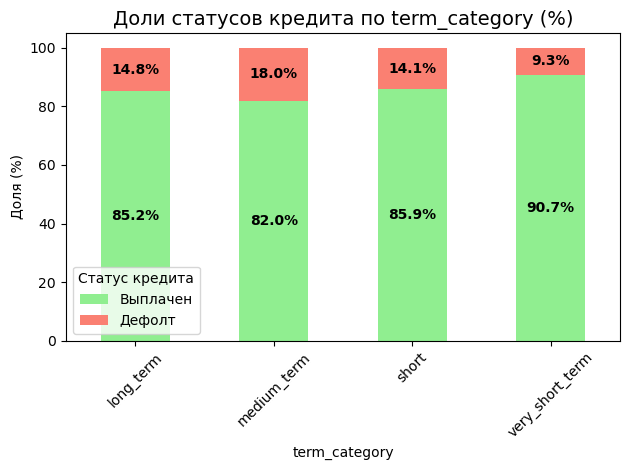

Таблица долей по term_category (%):
                 Выплачен  Дефолт
term_category                    
long_term            85.2    14.8
medium_term          82.0    18.0
short                85.9    14.1
very_short_term      90.7     9.3



In [302]:
term_summary = plot_category_percentages(data_clean, 'term_category')

Гипотеза не подтвердилась.

### Гипотеза 6. Цель кредита не влияет на вероятность его возврата

<Figure size 1000x600 with 0 Axes>

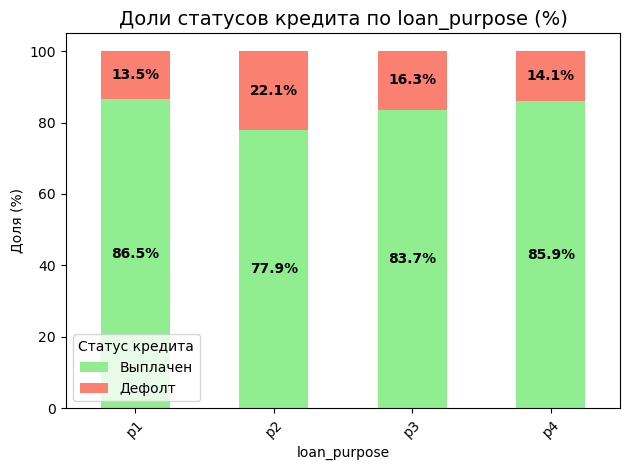

Таблица долей по loan_purpose (%):
              Выплачен  Дефолт
loan_purpose                  
p1                86.5    13.5
p2                77.9    22.1
p3                83.7    16.3
p4                85.9    14.1



In [307]:
term_summary = plot_category_percentages(data_clean, 'loan_purpose')

Это действительно так. Разница не значительна.

<Figure size 1000x600 with 0 Axes>

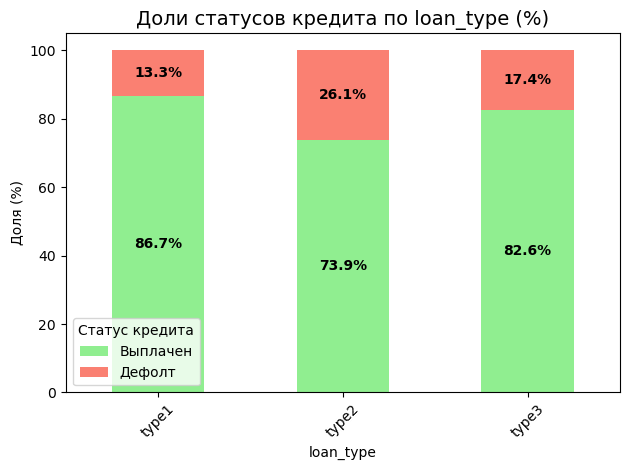

Таблица долей по loan_type (%):
           Выплачен  Дефолт
loan_type                  
type1          86.7    13.3
type2          73.9    26.1
type3          82.6    17.4



In [308]:
term_summary = plot_category_percentages(data_clean, 'loan_type')

Кредиты 2 типа невыплачивают гораздо чаще.

### Гипотеза 7. Коммерческие кредиты возвращают чаще

<Figure size 1000x600 with 0 Axes>

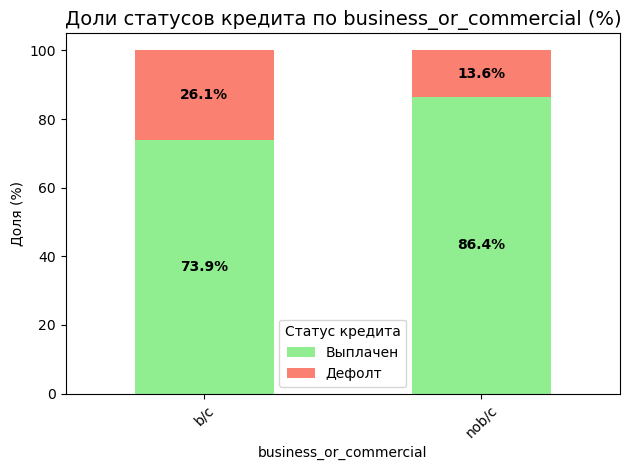

Таблица долей по business_or_commercial (%):
                        Выплачен  Дефолт
business_or_commercial                  
b/c                         73.9    26.1
nob/c                       86.4    13.6



In [309]:
term_summary = plot_category_percentages(data_clean, 'business_or_commercial')

Гипотеза не подтвердилась. Наоборот коммерческие кредиты в 2 раза чаще не возвращают.

### Гипотеза 8. Кредиты которые требуют единовременной оплаты по истичению срока, возвращают реже


<Figure size 1000x600 with 0 Axes>

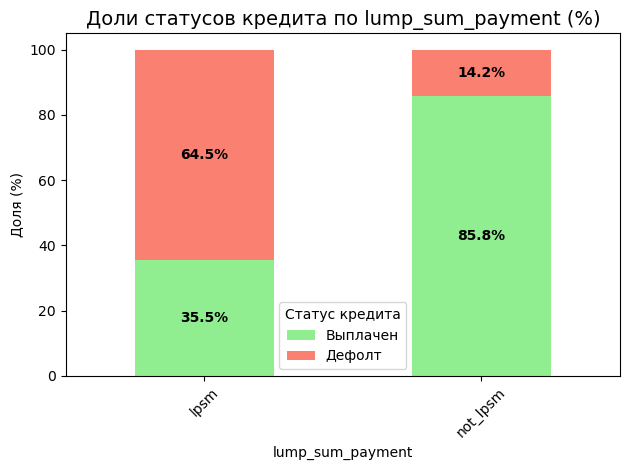

Таблица долей по lump_sum_payment (%):
                  Выплачен  Дефолт
lump_sum_payment                  
lpsm                  35.5    64.5
not_lpsm              85.8    14.2



In [310]:
term_summary = plot_category_percentages(data_clean, 'lump_sum_payment')

Кредиты требущие единовременной выплаты не возвращают в 4 раза чаще. Гипотеза подтвердилась.

### Гипотеза 9. Предодобренные кредиты чаще возвращают


<Figure size 1000x600 with 0 Axes>

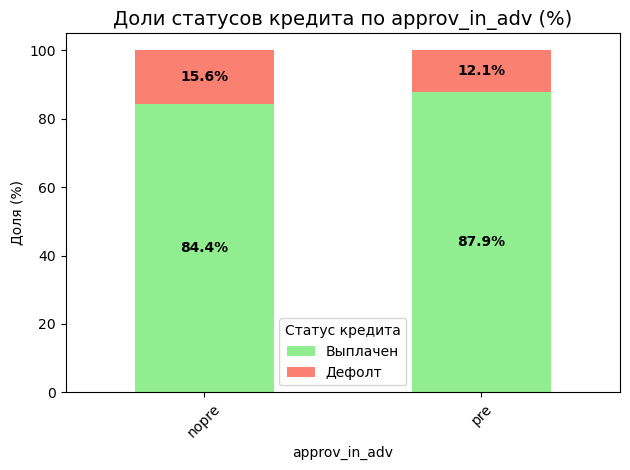

Таблица долей по approv_in_adv (%):
               Выплачен  Дефолт
approv_in_adv                  
nopre              84.4    15.6
pre                87.9    12.1



In [311]:
term_summary = plot_category_percentages(data_clean, 'approv_in_adv')

Гипотеза не подтвердилась. Доли возвращенных кредитов одинаковые.

### Гипотеза 10. Кредиты соответствующии лимита чаще возвращают


<Figure size 1000x600 with 0 Axes>

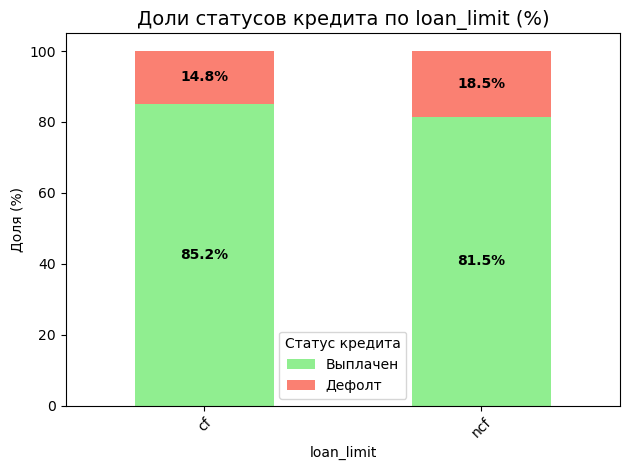

Таблица долей по loan_limit (%):
            Выплачен  Дефолт
loan_limit                  
cf              85.2    14.8
ncf             81.5    18.5



In [313]:
term_summary = plot_category_percentages(data_clean, 'loan_limit')

Гипотеза не подтвердилась. Возможно кредиты которые выходили за лимиты выдавали на коммерческие цели в надежде на грамотное управление и оценку рисков от компании заёмщика.

<Figure size 1000x600 with 0 Axes>

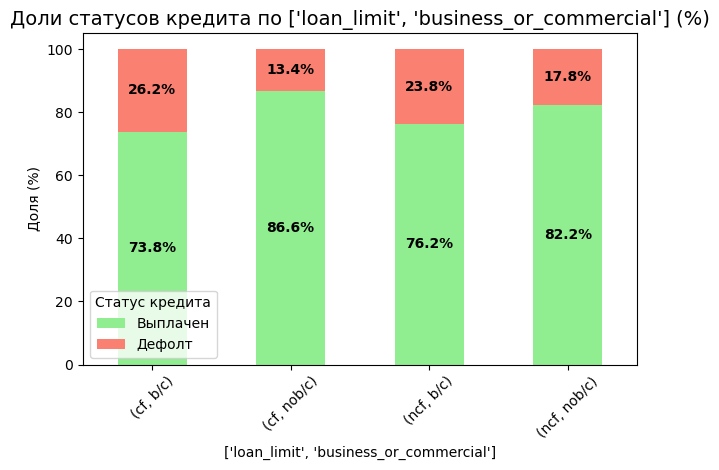

Таблица долей по ['loan_limit', 'business_or_commercial'] (%):
                                   Выплачен  Дефолт
loan_limit business_or_commercial                  
cf         b/c                         73.8    26.2
           nob/c                       86.6    13.4
ncf        b/c                         76.2    23.8
           nob/c                       82.2    17.8



In [315]:
term_summary = plot_category_percentages(data_clean, ['loan_limit', 'business_or_commercial'])

Теория не подтвердилась. Но выяснили что самые надежные - частные заёмщики, сумма кредитов которых ниже лимита.

### Гипотеза 11. Заёмщики с высокой кредитоспособностью чаще возвращают кредиты


<Figure size 1000x600 with 0 Axes>

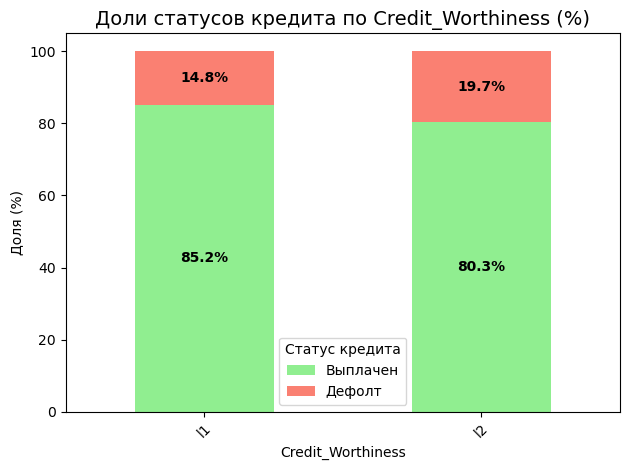

Таблица долей по Credit_Worthiness (%):
                   Выплачен  Дефолт
Credit_Worthiness                  
l1                     85.2    14.8
l2                     80.3    19.7



In [316]:
term_summary = plot_category_percentages(data_clean, 'Credit_Worthiness')

Не подтвердилась.